# Weather Analisys

## Importação das bibliotecas


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data

In [2]:
path = os.curdir
data_file_path = os.path.join(path, 'data', 'weather_report_data.csv')
df = pd.read_csv(data_file_path)
df.head()



,air_humidity_current,desc_current,desc_day,unit,rain_current,temp_current,temp_max,temp_min,wind_speed_current,date_time
0,84%,Chuva,Chuvas com trovoadas,°C,70%,24,24,18,13 km/h,2023-11-22 14:31:03.339912
1,63%,Parcialmente nublado,Parcialmente nublado,°C,1%,19,24,11,11 km/h,2023-11-24 19:17:19.461011
2,54%,Parcialmente nublado,Parcialmente nublado,°C,0%,22,24,13,11 km/h,2023-11-25 12:00:33.126553
3,62%,Nublado,Nublado,°C,1%,22,23,16,11 km/h,2023-11-26 12:00:24.975734
4,84%,Nublado,Chuva,°C,73%,19,20,17,11 km/h,2023-11-27 12:00:51.900562


## Cleaning and Renaming

In [3]:
df = df.rename(columns={
    'air_humidity_current': 'Corrente de umidade do ar (%)',
    'desc_current': 'Descrição atual',
    'desc_day': 'Descrição do dia',
    'unit': 'Umidade (°C)',
    'rain_current': 'Corrente de chuva (%)',
    'temp_current': 'Temperatura atual (°C)',
    'temp_max': 'Temperatura Máxima (°C)',
    'temp_min': 'Temperatura Mínima (°C)',
    'wind_speed_current': 'Velocidade do vento (Km/h)',
    'date_time': 'Data e hora'
})

# Removendo '%' e 'Km/h' e formatar como float
df['Corrente de umidade do ar (%)'] = df['Corrente de umidade do ar (%)'].astype(str).str.replace('%', '').astype(float) / 100
df['Corrente de chuva (%)'] = df['Corrente de chuva (%)'].astype(str).str.replace('%', '').astype(float) / 100
df['Velocidade do vento (Km/h)'] = df['Velocidade do vento (Km/h)'].astype(str).str.replace('km/h', '').astype(float)

# Convertendo a coluna 'Data e hora' para datetime
df['Data e hora'] = pd.to_datetime(df['Data e hora'])

# Criando novas colunas para data e hora
df['Data'] = df['Data e hora'].dt.date
df['Hora'] = df['Data e hora'].dt.time

# Excluindo a coluna original 'Data e hora' se necessário
df = df.drop(columns=['Data e hora'])

# Dropando a coluna 'Umidade (°C)'
df = df.drop(columns=['Umidade (°C)'])

df.head()


,Corrente de umidade do ar (%),Descrição atual,Descrição do dia,Corrente de chuva (%),Temperatura atual (°C),Temperatura Máxima (°C),Temperatura Mínima (°C),Velocidade do vento (Km/h),Data,Hora
0,0.84,Chuva,Chuvas com trovoadas,0.70,24,24,18,13.0,2023-11-22,14:31:03.339912
1,0.63,Parcialmente nublado,Parcialmente nublado,0.01,19,24,11,11.0,2023-11-24,19:17:19.461011
2,0.54,Parcialmente nublado,Parcialmente nublado,0.00,22,24,13,11.0,2023-11-25,12:00:33.126553
3,0.62,Nublado,Nublado,0.01,22,23,16,11.0,2023-11-26,12:00:24.975734
4,0.84,Nublado,Chuva,0.73,19,20,17,11.0,2023-11-27,12:00:51.900562


## Plots

In [4]:
# Validando se 'Data' é do tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Adicionando uma nova coluna 'Data_Formatada'
df['Data_Formatada'] = df['Data'].dt.strftime('%d/%m/%Y')


In [5]:
save_dir = os.path.join(path, 'references', 'analysis-graphs')
os.makedirs(save_dir, exist_ok=True)

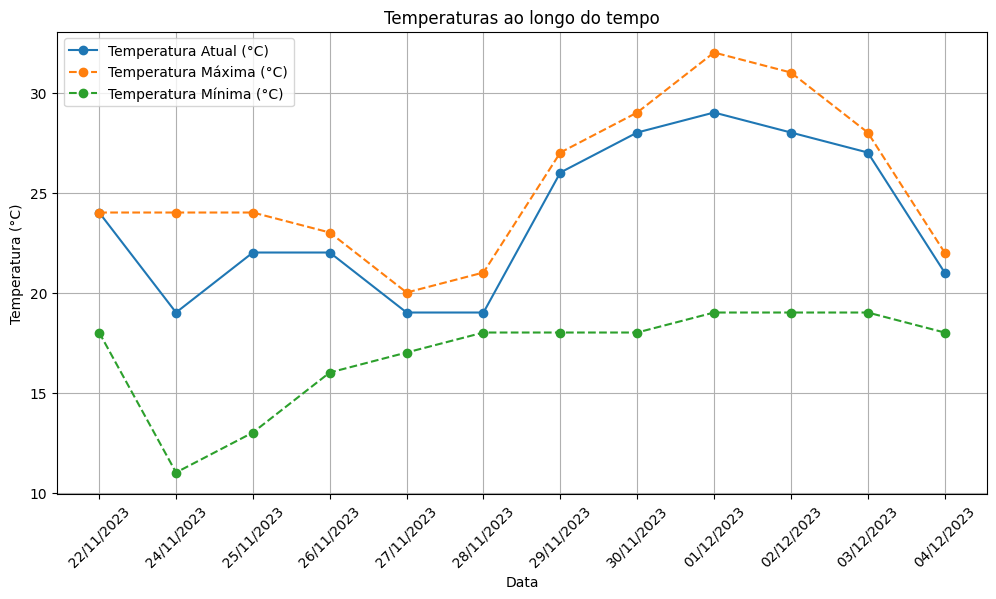

In [6]:

# Gráfico de Linha para Temperatura Atual, Máxima e Mínima
plt.figure(figsize=(12, 6))

plt.plot(df['Data_Formatada'], df['Temperatura atual (°C)'], label='Temperatura Atual (°C)', marker='o')
plt.plot(df['Data_Formatada'], df['Temperatura Máxima (°C)'], label='Temperatura Máxima (°C)', linestyle='--', marker='o')
plt.plot(df['Data_Formatada'], df['Temperatura Mínima (°C)'], label='Temperatura Mínima (°C)', linestyle='--', marker='o')

plt.title('Temperaturas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig(os.path.join(save_dir, 'plt1_Temperaturas.png'))

plt.show()

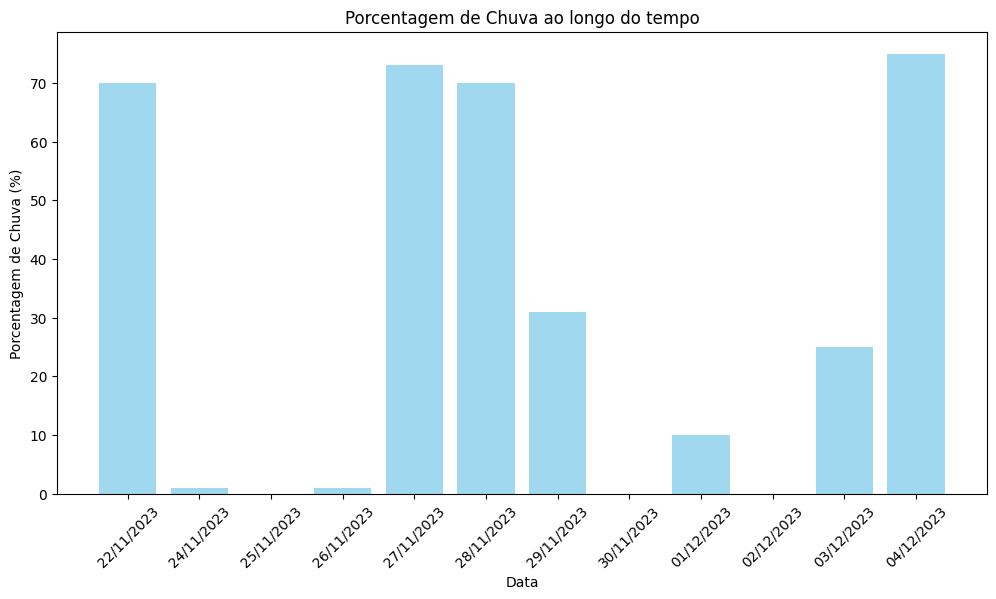

In [7]:

# Gráfico de Barras para Porcentagem de Chuva
plt.figure(figsize=(12, 6))

plt.bar(df['Data_Formatada'], df['Corrente de chuva (%)'] * 100, color='#a0d8ef')  # Alteração da cor para azul bebê

plt.title('Porcentagem de Chuva ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Porcentagem de Chuva (%)')
plt.xticks(rotation=45)
plt.grid(False)

plt.savefig(os.path.join(save_dir, 'plt2_Chuva.png'))

plt.show()

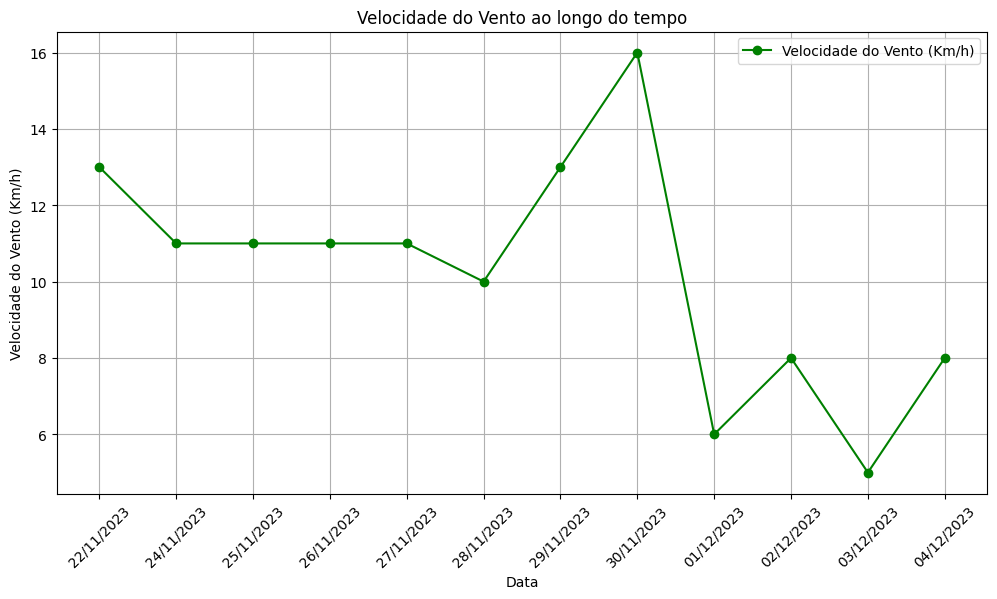

In [8]:

# Gráfico de Linha para Velocidade do Vento
plt.figure(figsize=(12, 6))

plt.plot(df['Data_Formatada'], df['Velocidade do vento (Km/h)'], label='Velocidade do Vento (Km/h)', marker='o', color='green')

plt.title('Velocidade do Vento ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Velocidade do Vento (Km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig(os.path.join(save_dir, 'plt3_Vento.png'))

plt.show()

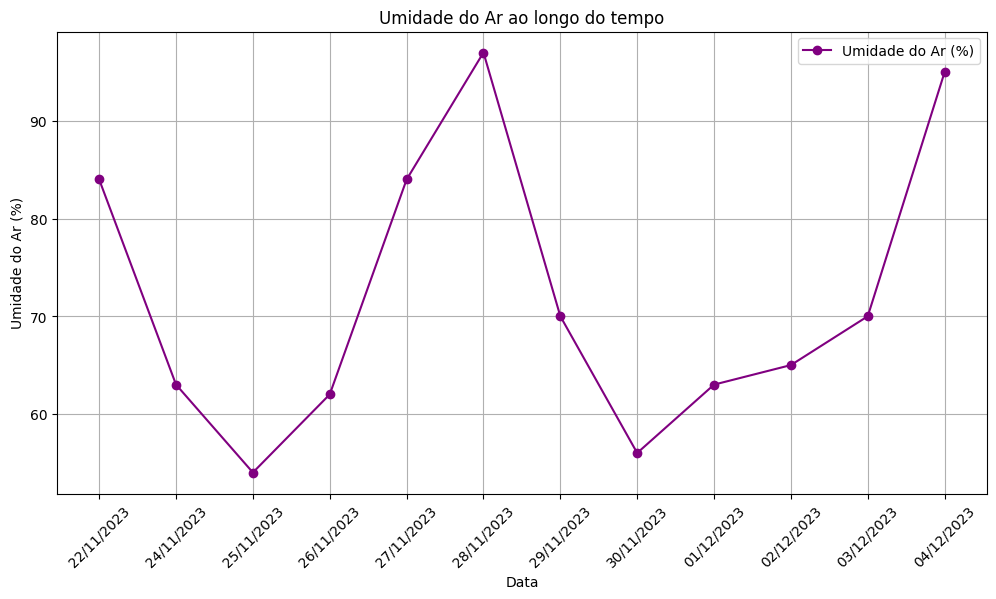

In [9]:

# Gráfico de Linha para Umidade do Ar Atual
plt.figure(figsize=(12, 6))

plt.plot(df['Data_Formatada'], df['Corrente de umidade do ar (%)'] * 100, label='Umidade do Ar (%)', marker='o', color='purple')

plt.title('Umidade do Ar ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Umidade do Ar (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig(os.path.join(save_dir, 'plt4_Umidade.png'))

plt.show()

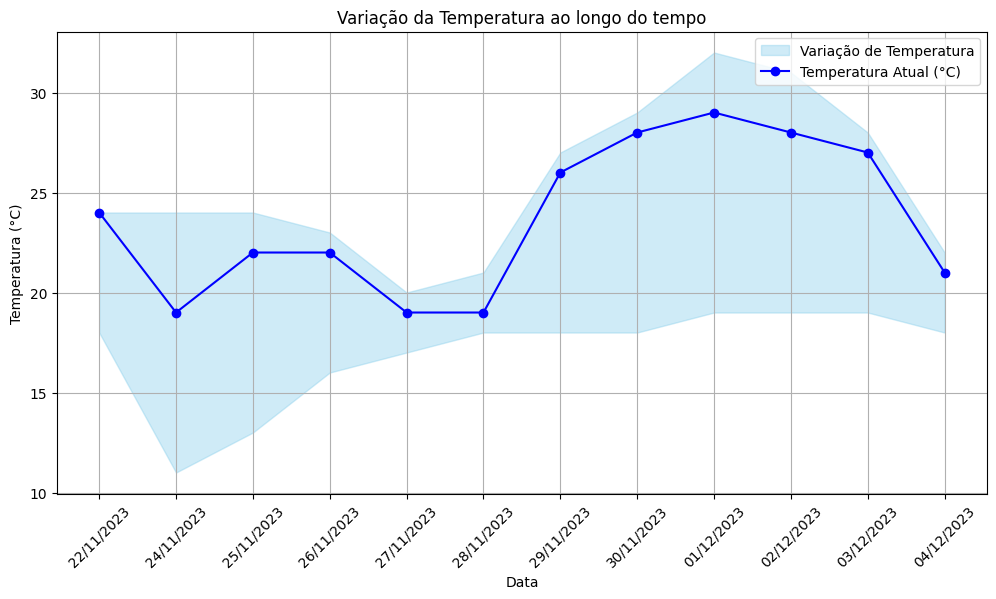

In [10]:

# Gráfico de área para a variação da temperatura
plt.figure(figsize=(12, 6))
plt.fill_between(df['Data_Formatada'], df['Temperatura Mínima (°C)'], df['Temperatura Máxima (°C)'], color='skyblue', alpha=0.4, label='Variação de Temperatura')
plt.plot(df['Data_Formatada'], df['Temperatura atual (°C)'], marker='o', label='Temperatura Atual (°C)', color='blue')

plt.title('Variação da Temperatura ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig(os.path.join(save_dir, 'plt5_VariacaoTemp.png'))

plt.show()

## Logs

### Loading Logs Data

In [11]:
logs_file_path = os.path.join(path, 'data', 'logs.csv')
df_logs = pd.read_csv(logs_file_path)
df_logs.head()

,user,execution_time,status
0,Ricardo Franco,0.896760,True
1,Ricardo Franco,1.026892,True
2,Ricardo Franco,1.188952,True
3,Ricardo Franco,0.969861,True
4,Ricardo Franco,1.194820,True


## Clealing and Renaming

In [12]:
# Renomeando as colunas do DataFrame df_logs
df_logs = df_logs.rename(columns={'user': 'Usuário', 'execution_time': 'Tempo de Execução', 'status': 'Status'})

# Adicionando a coluna 'Data_Formatada' do DataFrame df_logs
df_logs['Data_Formatada'] = df['Data_Formatada']

# Criando uma Series a partir da coluna 'Data_Formatada' do DataFrame df
serie_data_formatada = df_logs['Data_Formatada']

# Exibindo a Series e o DataFrame df_logs
print(df_logs)


           Usuário  Tempo de Execução  Status Data_Formatada
0   Ricardo Franco           0.896760    True     22/11/2023
1   Ricardo Franco           1.026892    True     24/11/2023
2   Ricardo Franco           1.188952    True     25/11/2023
3   Ricardo Franco           0.969861    True     26/11/2023
4   Ricardo Franco           1.194820    True     27/11/2023
5   Ricardo Franco           0.959009    True     28/11/2023
6   Ricardo Franco           0.977534    True     29/11/2023
7   Ricardo Franco           1.070475    True     30/11/2023
8   Ricardo Franco           1.037805    True     01/12/2023
9   Ricardo Franco           0.892731    True     02/12/2023
10  Ricardo Franco           0.874139    True     03/12/2023
11  Ricardo Franco           0.923999    True     04/12/2023


### Gráficos

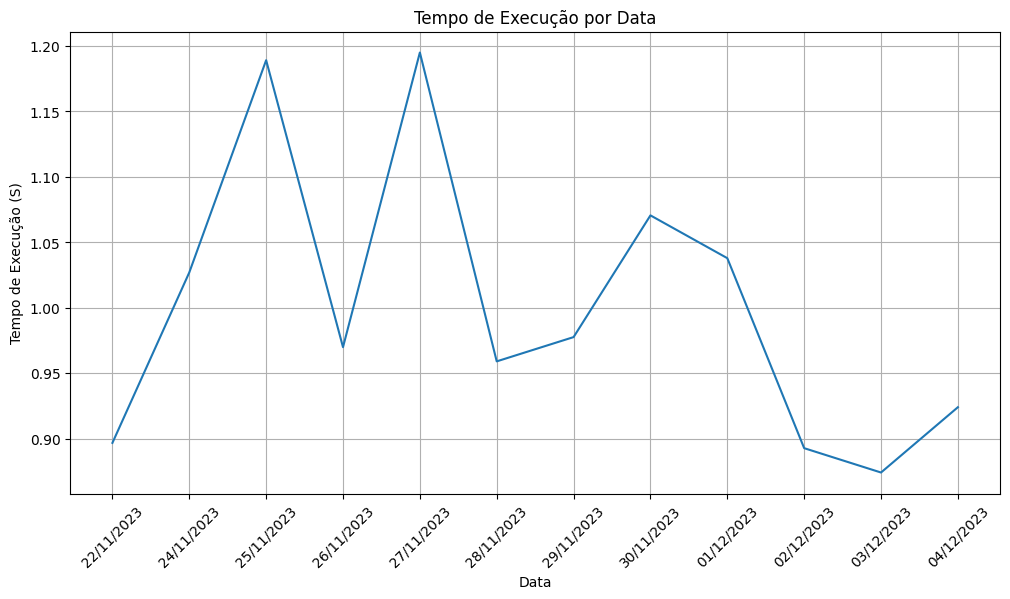

In [13]:
# 'Tempo de Execução'
df_logs['Tempo de Execução'] = pd.to_numeric(df_logs['Tempo de Execução'], errors='coerce')

# Gráfico do tempo de execução por data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data_Formatada', y='Tempo de Execução', data=df_logs)
plt.title('Tempo de Execução por Data')
plt.xlabel('Data')
plt.ylabel('Tempo de Execução (S)')
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig(os.path.join(save_dir, 'plt6_TempoExecucao.png'))

plt.show()

In [14]:
# Calculando a média do tempo de execução
media_tempo_execucao = df_logs['Tempo de Execução'].mean()

# Exibindo a média
print(f'Média do Tempo de Execução: {media_tempo_execucao}')

Média do Tempo de Execução: 1.0010812679926555
